In this notebook, we visualize the social-circles discovered by the unsupervised-learning algorithms (refer previous notebook). We look within the social-circles to study the members and meaning for the social-circle identified by the machine. Also, we look at the histogram plot of PageRank score of nodes in the ego-network. 

Interactive Graphics in R (with more granular details) can be found here: https://balaca.shinyapps.io/Twitter_Graph

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns;  sns.set()
% matplotlib inline

self_screen_name = 'bala_io'     
cluster_filename = self_screen_name + "_clusters.csv"      # groups/clusters identified 
clusters_df = pd.read_csv(cluster_filename)
clusters_df = clusters_df.set_index('Ids', drop = True)
n_clusters = 10

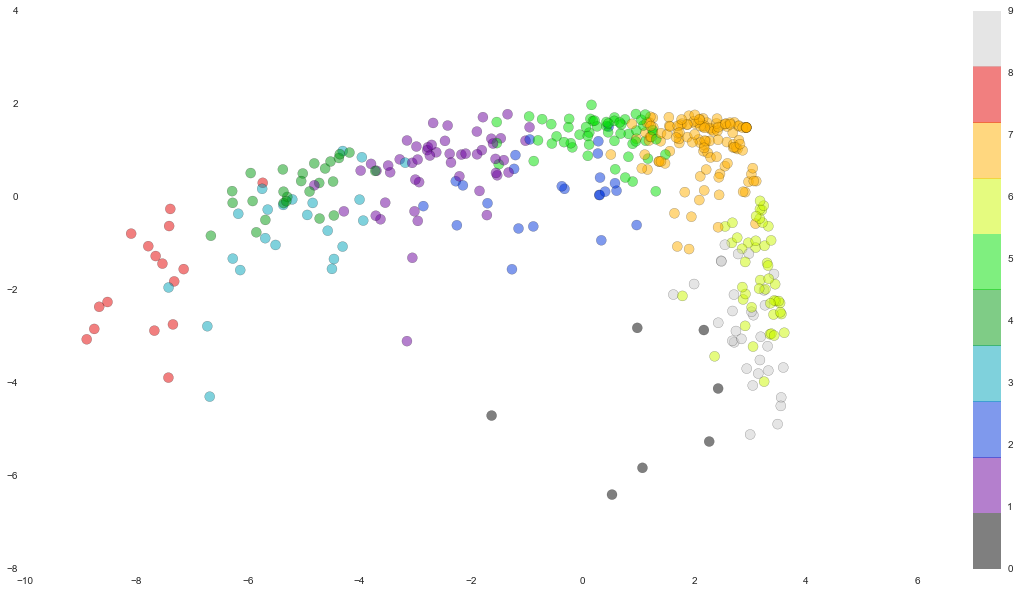

In [2]:
# KMeans clustering | Plot the ego-network in 2 dimensions
# plot the Ids in 2-dimensions as generated by PCA 

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(clusters_df['dim1'], clusters_df['dim2'], s = 100  ,c= clusters_df['clusterNo'], 
            alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

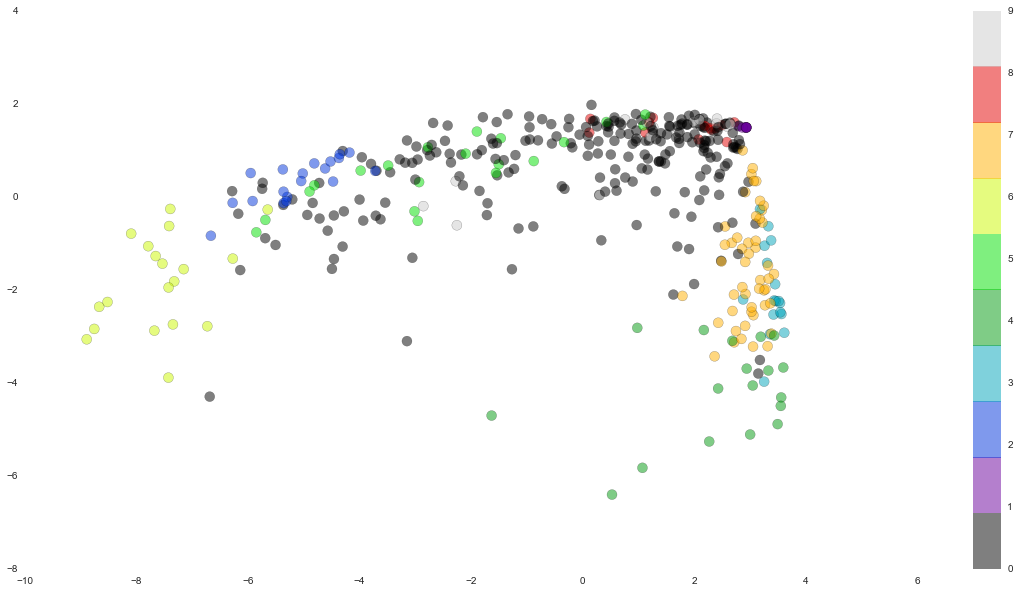

In [3]:
# Spectral clustering | Plot the ego-network in 2 dimensions
# plot the Ids in 2-dimensions as generated by PCA

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(clusters_df['dim1'], clusters_df['dim2'], s = 100  ,c= clusters_df['spectral'], 
            alpha=0.5, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

In [4]:
# Overall Top 100 Influencers in Social-Graph 
dummy_df = pd.DataFrame()
for i in range(10):
    dummy_df[i] = list (clusters_df [10*i : 10* i + 10]['names'])

print "*** Top 100 Influencers in the Ego-Network *** "
dummy_df

*** Top 100 Influencers in the Ego-Network *** 


,0,1,2,3,4,5,6,7,8,9
0,Marc Andreessen,Aaron Levie,Benedict Evans,Hilary Mason,Hunter Walk,mark pincus,David Sacks,Paul Kedrosky,danah boyd,Kevin Weil
1,Elon Musk,Paul Graham,WIRED,Walt Mossberg,Kevin Rose,Horace Dediu,Mike Bloomberg,Steven Sinofsky,Matt Mullenweg,danprimack
2,Tim O'Reilly,Chris Dixon,Chris Anderson,Dave McClure,Josh Kopelman,jason,Peter Fenton,Steven Pinker,Brian Chesky,Paul Buchheit
3,Ev Williams,Ben Horowitz,Nate Silver,Sam Altman,Biz Stone,Tony Fadell,Patrick Collison,Shervin Pishevar,Emily Chang,Chamath Palihapitiya
4,Om Malik,marissamayer,Vinod Khosla,Drew Houston,Bill Gross,Jeff Weiner,Josh Elman,Re/code,Jeff Clavier,Luke Wroblewski
5,Reid Hoffman,Bill Gurley,John Doerr,Tim Cook,Keith Rabois,Jonah Peretti,Ron Conway,Sarah Lacy,Clayton Christensen,Startup L. Jackson
6,Kara Swisher,Chris Sacca,Steven Levy,Nick Bilton,Gabe Rivera,Y Combinator,Jessica Verrilli,Philip Kaplan,Bijan Sabet,Andrew Mason
7,Bill Gates,Eric Schmidt,John Maeda,Joi Ito,Satya Nadella,Naval Ravikant,Pierre Omidyar,dj patil,John Carmack,Dan Frommer
8,Fred Wilson,TechCrunch,Mitch Kapor,Steve Case,Brad Stone,John Markoff,Liz Gannes,Mark Suster,Adam D'Angelo,Balaji S. Srinivasan
9,dick costolo,Max Levchin,Dave Morin,Jessica Lessin,Bradley Horowitz,Bret Taylor,Jeremy Stoppelman,David Lee,Paul Krugman,Kevin Kelly


In [5]:
# KMeans Clustering | Cluster-wise Top-influencers in self-organized clusters in Social-Graph
dummy_df = pd.DataFrame()

for i in range(n_clusters):
    
    nodes_in_cluster = list( clusters_df [clusters_df['clusterNo'] == i ]['names'] )     
    if len(nodes_in_cluster) >= 10:            # identify only clusters which are big enough. say size > 20        
        col_name           = str(i) + " : " + str(len(nodes_in_cluster)) + " Ids"
        dummy_df[col_name] = nodes_in_cluster[:10]
        
print "*** KMeans Clustering | Social-Circle-wise Top-influencers [Circle-number : # of users in the circle] *** "
dummy_df

*** KMeans Clustering | Social-Circle-wise Top-influencers [Circle-number : # of users in the circle] *** 


,1 : 51 Ids,2 : 24 Ids,3 : 23 Ids,4 : 26 Ids,5 : 56 Ids,6 : 47 Ids,7 : 122 Ids,8 : 16 Ids,9 : 31 Ids
0,Nate Silver,WIRED,Tim O'Reilly,Dave Morin,Philip Kaplan,Microsoft Research,Edward Tufte,Marc Andreessen,Mike Bostock
1,Satya Nadella,John Maeda,Bill Gates,Dave McClure,John Carmack,Google Research,Tina Roth Eisenberg,Elon Musk,Hadley Wickham
2,Horace Dediu,John Markoff,marissamayer,Sam Altman,Luke Wroblewski,Lynn Cherny,IDEO,Ev Williams,Drew Conway
3,Tony Fadell,Steven Pinker,Eric Schmidt,Drew Houston,Garry Tan,Andrew Ng,Vivek Wadhwa,Om Malik,Nathan Yau
4,Jonah Peretti,danah boyd,TechCrunch,Jessica Lessin,DHH,Olivier Grisel,Irene Au,Reid Hoffman,Mike Olson
5,Bret Taylor,Clayton Christensen,Chris Anderson,Hunter Walk,Jessica Livingston,Trey Causey,Deb Roy,Kara Swisher,Wes McKinney
6,Mike Bloomberg,Paul Krugman,Vinod Khosla,Josh Kopelman,Sean Ellis,Jure Leskovec,Forbes Tech News,Fred Wilson,Sean J. Taylor
7,Patrick Collison,Kevin Kelly,John Doerr,Keith Rabois,Craig Mod,Yann LeCun,Josh Brewer,dick costolo,Edd Dumbill
8,Jessica Verrilli,steve blank,Steven Levy,Gabe Rivera,Venture Hacks,John D. Cook,Erik Schatzker,Aaron Levie,John Myles White
9,Jeremy Stoppelman,Thomas L. Friedman,Mitch Kapor,mark pincus,Tom Hulme,Fernando Perez,O'Reilly Media,Paul Graham,Amr Awadallah


In [6]:
# Spectral Clustering | Cluster-wise Top-influencers in self-organized clusters in Social-Graph
dummy_df = pd.DataFrame()

for i in range(n_clusters):
    
    nodes_in_cluster = list( clusters_df [clusters_df['spectral'] == i ]['names'] )     
    if len(nodes_in_cluster) >= 10:            # identify only clusters which are big enough. say size > 20        
        col_name           = str(i) + " : " + str(len(nodes_in_cluster)) + " Ids"
        dummy_df[col_name] = nodes_in_cluster[:10]
        
print "*** Spectral Clustering | Social-Circle-wise Top-influencers [Circle-number : # of users in the circle] *** "
dummy_df

*** Spectral Clustering | Social-Circle-wise Top-influencers [Circle-number : # of users in the circle] *** 


,0 : 225 Ids,2 : 19 Ids,3 : 17 Ids,4 : 18 Ids,5 : 20 Ids,6 : 19 Ids,7 : 49 Ids,8 : 13 Ids,9 : 17 Ids
0,Tim O'Reilly,Dave McClure,Lynn Cherny,Hilary Mason,Sam Altman,Marc Andreessen,Mike Bostock,Luke Wroblewski,WIRED
1,TechCrunch,Hunter Walk,Olivier Grisel,dj patil,Drew Houston,Elon Musk,Microsoft Research,Daniel Burka,John Maeda
2,Benedict Evans,Josh Kopelman,Trey Causey,Jeff Hammerbacher,Bret Taylor,Ev Williams,Google Research,Josh Brewer,Clayton Christensen
3,Chris Anderson,Keith Rabois,John D. Cook,Hadley Wickham,Patrick Collison,Om Malik,Edd Dumbill,Braden Kowitz,Tom Hulme
4,Nate Silver,Gabe Rivera,Fernando Perez,Drew Conway,Ron Conway,Reid Hoffman,Andrew Ng,Jon Wiley,IDEO
5,Vinod Khosla,mark pincus,Scientific Python,Wes McKinney,Jeremy Stoppelman,Kara Swisher,Jeffrey Heer,Twitter Design,MIT Media Lab
6,John Doerr,jason,Guido van Rossum,Sean J. Taylor,Brian Chesky,Bill Gates,jake hofman,Google Design,Stanford d.school
7,Steven Levy,Naval Ravikant,Jake Vanderplas,Peter Skomoroch,Adam D'Angelo,Fred Wilson,Jure Leskovec,brynn evans,Co.Design
8,Mitch Kapor,David Sacks,Andreas Mueller,John Myles White,Paul Buchheit,dick costolo,Mike Loukides,ZURB,Tim Brown
9,Dave Morin,Peter Fenton,Peter Wang,bradford cross,Andrew Mason,Aaron Levie,Yann LeCun,Jake Knapp,Stanford Business


In [7]:
#tell pandas to display wide tables as pretty HTML tables Ref:CS109
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

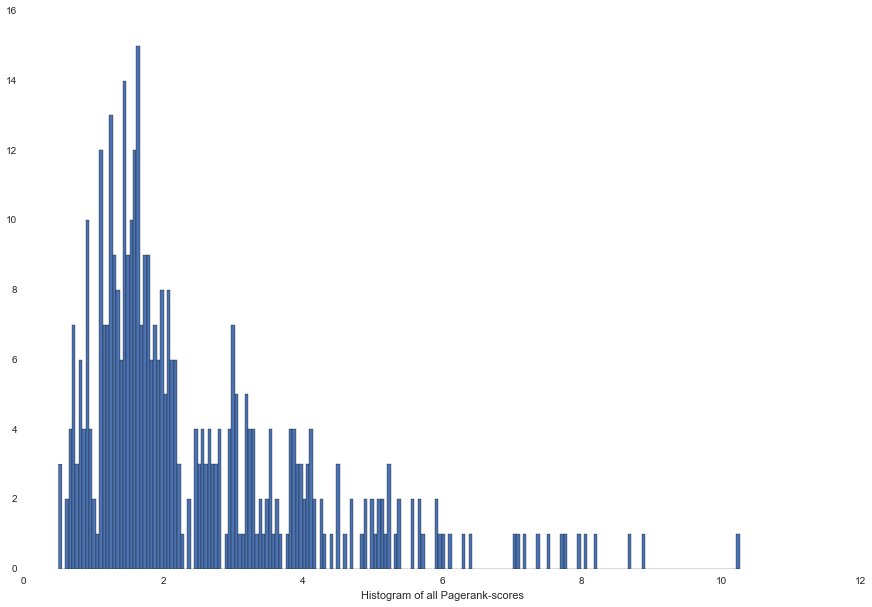

In [8]:
scaled_PageRank_scores =  clusters_df['PageRanks'] * 1000
scaled_PageRank_scores.order().hist(bins = len(clusters_df.index)/2, figsize = (15,10))
plt.xlabel("Histogram of all Pagerank-scores")
remove_border()

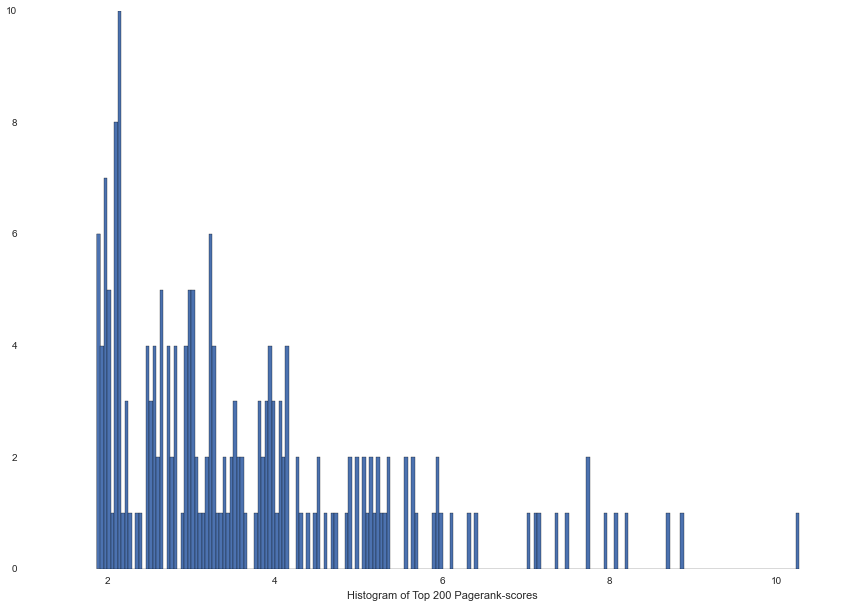

In [9]:
scaled_PageRank_scores =  clusters_df['PageRanks'][:200] * 1000
scaled_PageRank_scores.order().hist(bins = len(clusters_df.index)/2, figsize = (15,10))
plt.xlabel("Histogram of Top 200 Pagerank-scores")
remove_border()